In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\Linear Regression\Datasets\Real_Estate.csv')
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [20]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,year
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,2012
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,2012


In [3]:
df.shape

(414, 7)

In [4]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405072,11.757670,0.000000,9.900000,16.450000,30.375000,42.700000
Distance to the nearest MRT station,414.0,1064.468233,1196.749385,23.382840,289.324800,506.114400,1454.279000,6306.153000
Number of convenience stores,414.0,4.265700,2.880498,0.000000,2.000000,5.000000,6.750000,10.000000
Latitude,414.0,24.973605,0.024178,24.932075,24.952422,24.974353,24.994947,25.014578
Longitude,414.0,121.520268,0.026989,121.473888,121.496866,121.520912,121.544676,121.565321
House price of unit area,414.0,29.102149,15.750935,0.000000,18.422493,30.394070,40.615184,65.571716


In [7]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [8]:
df.duplicated().sum()  

np.int64(0)

In [9]:
df['year']=pd.DatetimeIndex(df['Transaction date']).year
df.head

<bound method NDFrame.head of                Transaction date  House age  \
0    2012-09-02 16:42:30.519336       13.3   
1    2012-09-04 22:52:29.919544       35.5   
2    2012-09-05 01:10:52.349449        1.1   
3    2012-09-05 13:26:01.189083       22.2   
4    2012-09-06 08:29:47.910523        8.5   
..                          ...        ...   
409  2013-07-25 15:30:36.565239       18.3   
410  2013-07-26 17:16:34.019780       11.9   
411  2013-07-28 21:47:23.339050        0.0   
412  2013-07-29 13:33:29.405317       35.9   
413  2013-08-01 09:49:41.506402       12.0   

     Distance to the nearest MRT station  Number of convenience stores  \
0                             4082.01500                             8   
1                              274.01440                             2   
2                             1978.67100                            10   
3                             1055.06700                             5   
4                              967.40000       

In [10]:
num = df.drop(columns=['Transaction date','Latitude','Longitude'],axis=1)
num

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,year
0,13.3,4082.01500,8,6.488673,2012
1,35.5,274.01440,2,24.970725,2012
2,1.1,1978.67100,10,26.694267,2012
3,22.2,1055.06700,5,38.091638,2012
4,8.5,967.40000,6,21.654710,2012
...,...,...,...,...,...
409,18.3,170.12890,6,29.096310,2013
410,11.9,323.69120,2,33.871347,2013
411,0.0,451.64190,8,25.255105,2013
412,35.9,292.99780,5,25.285620,2013


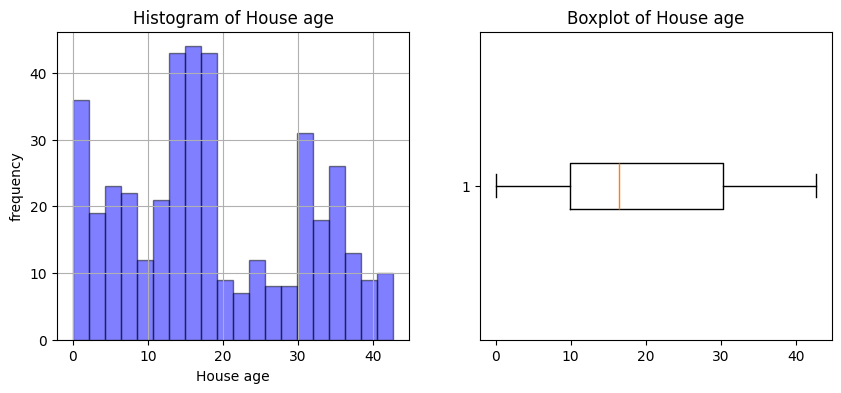

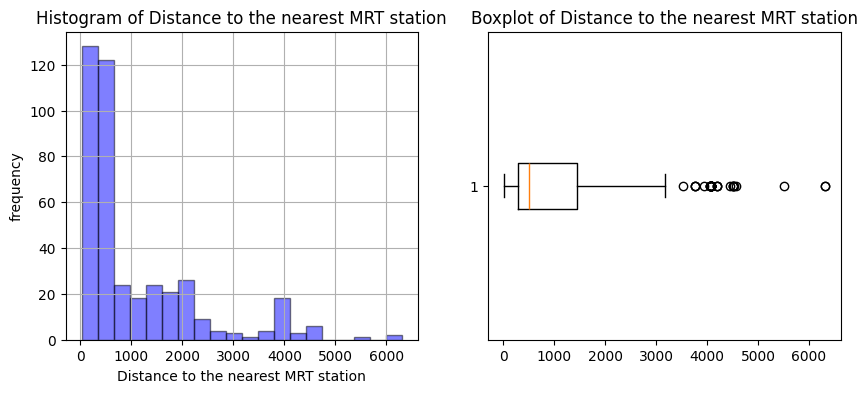

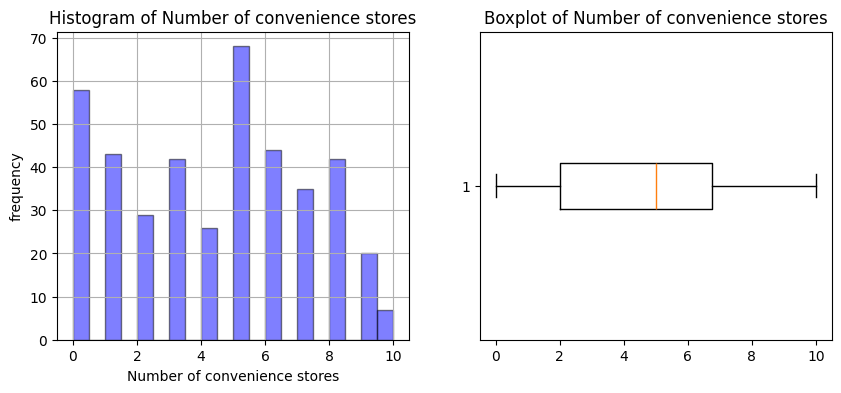

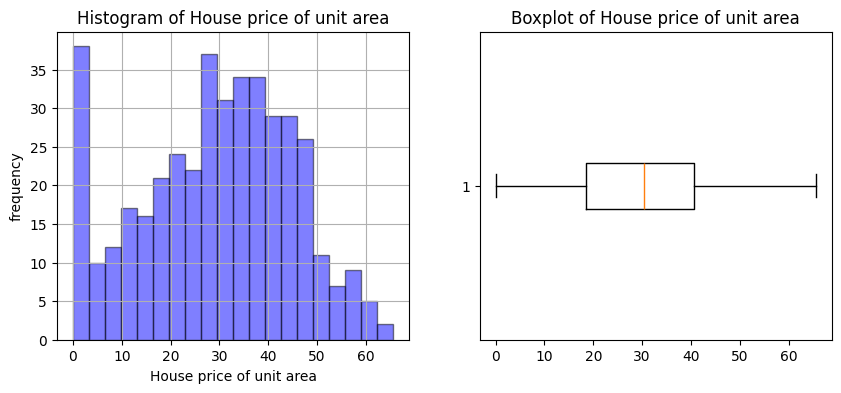

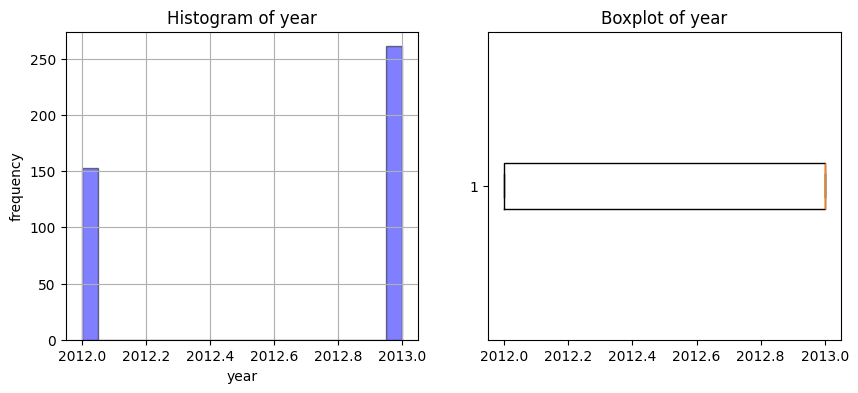

In [11]:
for i in num.columns:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    df[i].hist(bins=20,alpha=0.5,color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('frequency')
    
    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)
    plt.title(f'Boxplot of {i}')
    
    plt.show()

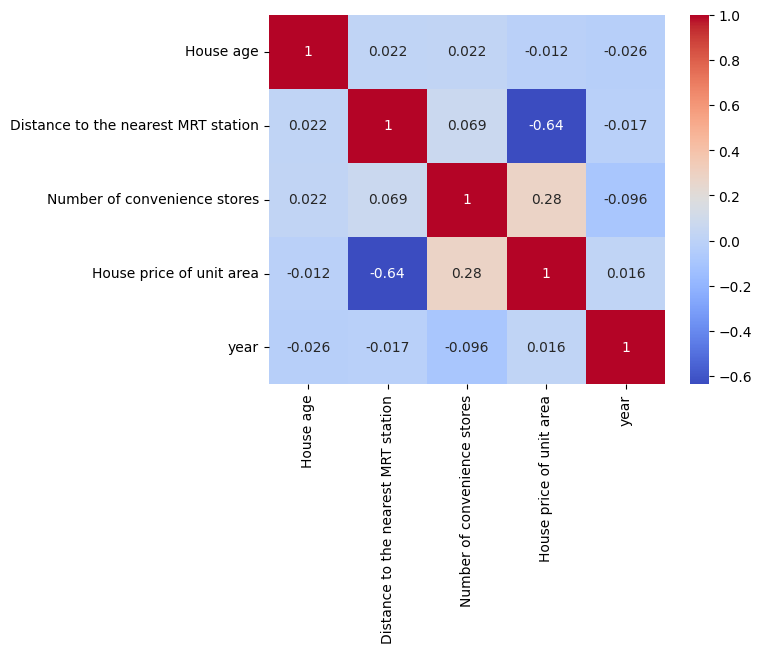

In [12]:
corr = num.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [13]:
X = df[['Distance to the nearest MRT station']]
y = df[['House price of unit area']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
degree = 4 # speacify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_poly)
y_pred

array([[33.77754424],
       [24.66940064],
       [36.12625411],
       [36.71389635],
       [24.23489521],
       [33.41098471],
       [23.96135703],
       [36.71389635],
       [37.12534276],
       [ 7.06938088],
       [35.73767473],
       [28.07231304],
       [18.36701724],
       [33.977782  ],
       [37.0104506 ],
       [35.55185658],
       [38.43799909],
       [30.50938876],
       [33.15021436],
       [32.79675558],
       [33.15021436],
       [35.14529613],
       [33.37319802],
       [33.15021436],
       [18.85534798],
       [31.78325175],
       [15.12247229],
       [21.97306345],
       [34.37562678],
       [25.67930532],
       [37.25081643],
       [37.46070788],
       [36.92350446],
       [35.60107218],
       [35.60107218],
       [33.61759588],
       [16.58195183],
       [37.2595039 ],
       [34.28340754],
       [34.27834238],
       [31.35386086],
       [38.2213377 ],
       [ 4.82708017],
       [ 4.82708017],
       [37.03977172],
       [32

In [18]:
train_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_test, y_pred)

print("RMSE:",train_rmse)
print("R2 Score:",r2_train)

RMSE: 12.236245333562561
R2 Score: 0.4587747135556469


In [21]:
new_data = [[81.3]]
new_data_poly = poly_features.fit_transform(new_data)
new_pred = model.predict(new_data_poly)
new_pred

array([[38.57722089]])